In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60935 entries, 0 to 60934
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   repo       60935 non-null  object 
 1   java_file  60935 non-null  object 
 2   acoco      60935 non-null  object 
 3   CAMC       60935 non-null  object 
 4   CAMC-cvc   60935 non-null  object 
 5   cc         60935 non-null  object 
 6   coco       60935 non-null  object 
 7   fout       60935 non-null  int64  
 8   hsd        60935 non-null  float64
 9   hse        60935 non-null  float64
 10  hsv        60935 non-null  float64
 11  LCOM5      60935 non-null  object 
 12  LCOM5-cvc  60935 non-null  object 
 13  loc        60935 non-null  int64  
 14  midx       60935 non-null  float64
 15  MMAC       60935 non-null  object 
 16  MMAC-cvc   60935 non-null  object 
 17  mncoco     60935 non-null  object 
 18  mxcoco     60935 non-null  object 
 19  NHD        60935 non-null  object 
 20  NHD-cv

In [10]:
df[["java_file", "cc", "nobl"]]

,java_file,cc,nobl
0,/dsl/camel-jbang/camel-jbang-console/src/main/...,2,2
1,/dsl/camel-jbang/camel-jbang-console/src/main/...,16,2
2,/dsl/camel-jbang/camel-jbang-console/src/main/...,19,3
3,/dsl/camel-jbang/camel-jbang-console/src/main/...,2,0
4,/dsl/camel-jbang/camel-jbang-console/src/main/...,4,0
...,...,...,...
60930,/components/camel-ssh/src/main/java/org/apache...,1,0
60931,/components/camel-ssh/src/main/java/org/apache...,1,0
60932,/components/camel-ssh/src/main/java/org/apache...,1,0
60933,/components/camel-ssh/src/main/java/org/apache...,1,0


In [11]:
df[["java_file", "cc", "nobl", "coco"]].isnull().any().any()

False

In [17]:
df["nobl"].unique()

array([ 2,  3,  0,  7,  5,  1,  4,  9,  6,  8, 31, 14, 10, 12, 25, 20, 38,
       18, 13, 21, 11, 15, 16, 19, 34, 23, 22, 58, 17, 28, 37, 26, 60, 50,
       24])

In [21]:
filtered_df = df[df["cc"].notna() & (df["cc"] != '-') & df["nobl"].notna() & (df["nobl"] != '-')]
filtered_df["cc"] = filtered_df["cc"].astype(int)
filtered_df["nobl"] = filtered_df["nobl"].astype(int)
filtered_df["hsd"] = filtered_df["hsd"].astype(int)
filtered_df[["nobl", "cc", "hsd"]].corr()

/tmp/ipykernel_2378/1727222335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["cc"] = filtered_df["cc"].astype(int)
/tmp/ipykernel_2378/1727222335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["nobl"] = filtered_df["nobl"].astype(int)
/tmp/ipykernel_2378/1727222335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,nobl,cc,hsd
nobl,1.000000,0.219787,0.408300
cc,0.219787,1.000000,0.479612
hsd,0.408300,0.479612,1.000000


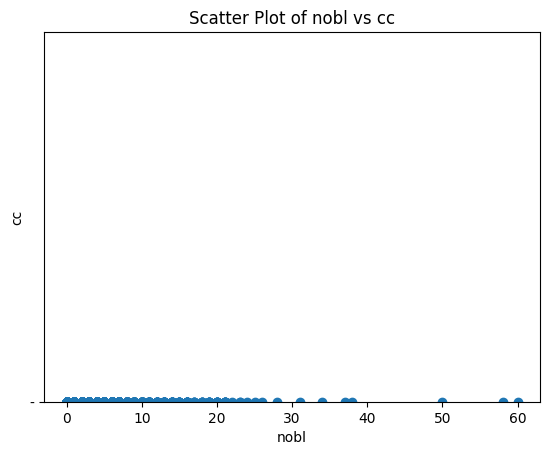

In [25]:
import matplotlib.pyplot as plt

plt.scatter(filtered_df["nobl"], filtered_df["coco"])
plt.xlabel("nobl")  # Label for the x-axis
plt.ylabel("cc")    # Label for the y-axis
plt.ylim(ymin=0, ymax=200) 
plt.title("Scatter Plot of nobl vs cc")
plt.show()